<a href="https://colab.research.google.com/github/JordiCarrasco6/Simulaci-Sistemes-Nano/blob/main/Homework_3(Oscil%C2%B7ladorHarmonic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Partícula en 1D Oscil·lador Harmònic**

Assumim que la partícula és un ekectró i utilitzem les unitats atòmiques.

Importem les llibreries que necessitem.

In [102]:
import numpy as np
import matplotlib.pyplot as plt

S'utilitza la constant de força k=1 com en el llibre de química d'exemple: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Quantum_Tutorials_(Rioux)/09%3A_Numerical_Solutions_for_Schrodinger's_Equation/9.09%3A_Numerical_Solutions_for_the_Harmonic_Oscillator

In [103]:
#Potencial com a funció de la posició.
def getV(x):
    potvalue = (5/2)*x**2
    return potvalue

Ara definim el codi per obtenir una matriu que codifica l'Equació de Schrödinger.

In [104]:
#Valors de la discretització de 0 a n-1.
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Llavors ja podem passar a la part numèrica. Per fer-ho hem de definir els valors de la discretització (h) i la mida de la caixa (L)


In [105]:
#Interval de calcul de la funció d'ona [-L/2,L/2]
L = 20
xlower = -L/2.0
xupper = L/2.0

#Discretizatió
h = 0.02  #discretizatió al espai

#Creem coordenades a les que la solució es calcularà
x = np.arange(xlower,xupper+h,h)
#Quants punts volem entre l'interval de la mida [-L/2,L/2]
npoints=len(x)

print("Using",npoints, "grid points.")

Using 1001 grid points.


Ja hem calculat la matriu. Els resultats apareixen diagonalitzats però no ordenats. Els ordenem pels valors de les energies.


In [106]:
#Calcul de la ES discretitzad i diagonalitzada
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenem pels Valors Propis
# w son els Valors propis ordenats i vs els vectors propis ordenats
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Nivell d'Energia
E = - w/(2.0*h**2)

Mostrem els primers valors d'energia.

In [107]:
#Nivells d'Energia
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=1.1180
n= 1 , E(numeric)=3.3538
n= 2 , E(numeric)=5.5894
n= 3 , E(numeric)=7.8247
n= 4 , E(numeric)=10.0597


Mostrem les funcions d'ona obtingudes en el procés.

Plotting


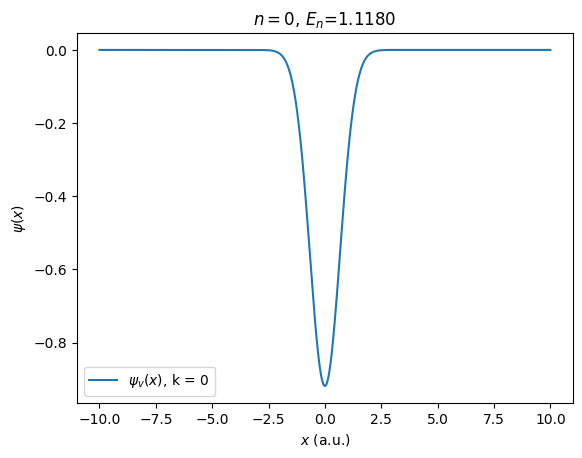

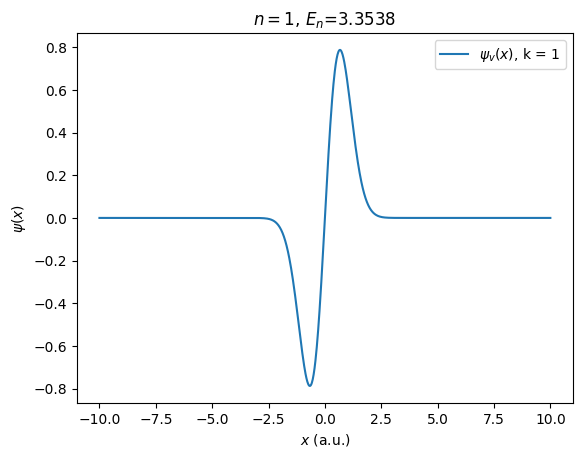

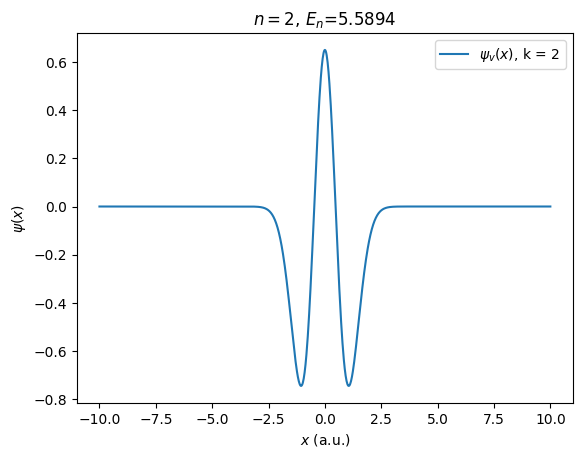

In [108]:
#Llista vuida de n-punts
psi = [None]*npoints

#Calcul de les funcions d'ona normalitzades
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Gràfica de les funcions d'ona
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,3):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()



REPLICA DEL CODI PER FER L'APARTAT 2. CANVI EN LA DISCRETITZACIÓ.

In [109]:
#Potencial com a funció
def getV(x):
    potvalue = (5/2)*x**2
    return potvalue

In [110]:
#Valors de la discretització de 0 a n-1.
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

In [115]:
#Interval de calcul de la funció d'ona [-L/2,L/2]
L = 20
xlower = -L/2.0
xupper = L/2.0

#Discretizatió
h = 0.05  #discretizatió al espai

#Creem coordenades a les que la solució es calcularà
x = np.arange(xlower,xupper+h,h)
#Quants punts volem entre l'interval de la mida [-L/2,L/2]
npoints=len(x)

print("Using",npoints, "grid points.")

Using 401 grid points.


In [116]:
#Calcul de la ES discretitzad i diagonalitzada
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenem pels Valors Propis
# w son els Valors propis ordenats i vs els vectors propis ordenats
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Nivell d'Energia
E = - w/(2.0*h**2)

In [117]:
#Nivells d'Energia
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=1.1176
n= 1 , E(numeric)=3.3521
n= 2 , E(numeric)=5.5851
n= 3 , E(numeric)=7.8165
n= 4 , E(numeric)=10.0463


Plotting


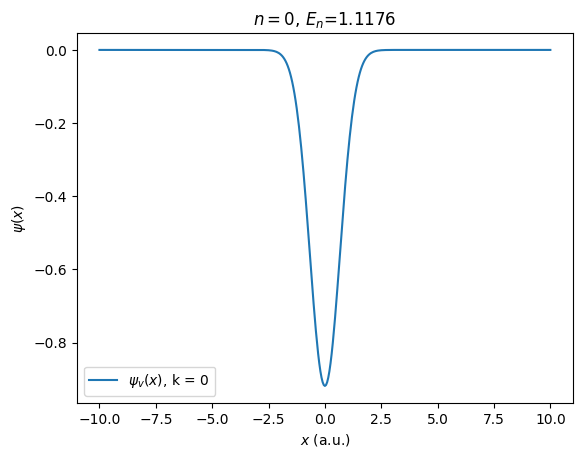

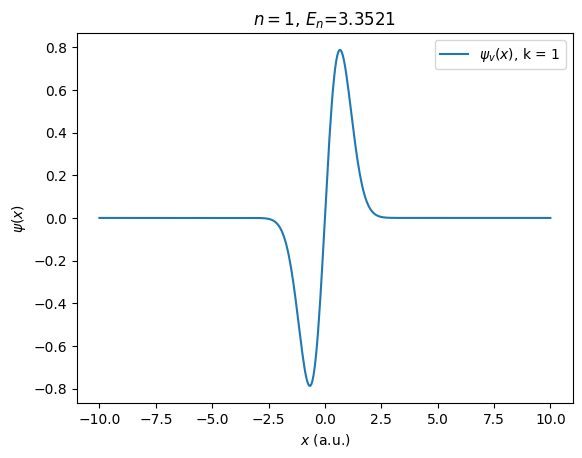

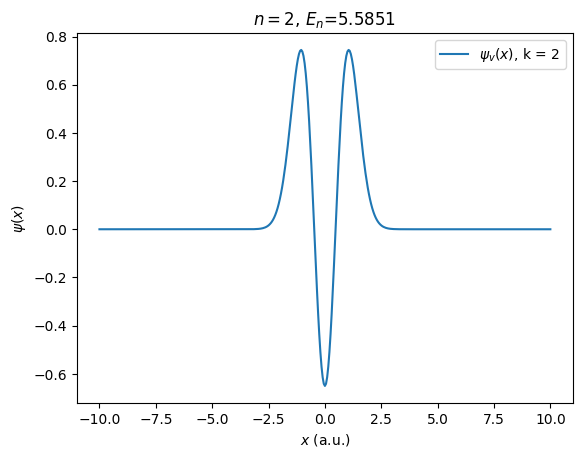

In [118]:
#Llista vuida de n-punts
psi = [None]*npoints

#Calcul de les funcions d'ona normalitzades
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Gràfica de les funcions d'ona
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,3):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()